In [64]:
import pandas as pd

benchmark = pd.read_csv(
    "../data/benchmark.csv",
    sep=",",
    date_format="%Y-%m-%d",
    parse_dates=True,
    index_col="Date",
)
benchmark

,OISESTR,SPX,SX5T
Date,,,
2019-10-01,-0.549,2940.250000,3518.250000
2019-10-02,-0.551,2887.610107,3413.310059
2019-10-03,-0.555,2910.629883,3417.370117
2019-10-04,-0.553,2952.010010,3446.709961
2019-10-07,-0.554,2938.790039,3471.239990
...,...,...,...
2024-02-08,3.908,4997.910156,4710.779785
2024-02-12,3.909,5021.839844,4746.350098
2024-02-13,3.909,4953.169922,4689.279785


In [65]:
for col in benchmark.columns:
    benchmark[col] = benchmark[col].rolling(2).apply(lambda x: (x[1]-x[0]) / abs(x[0]))
    
benchmark

C:\Users\bzloch\AppData\Local\Temp\ipykernel_19424\269628601.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  benchmark[col] = benchmark[col].rolling(2).apply(lambda x: (x[1]-x[0]) / abs(x[0]))


,OISESTR,SPX,SX5T
Date,,,
2019-10-01,NaN,NaN,NaN
2019-10-02,-0.003643,-0.017903,-0.029827
2019-10-03,-0.007260,0.007972,0.001189
2019-10-04,0.003604,0.014217,0.008586
2019-10-07,-0.001808,-0.004478,0.007117
...,...,...,...
2024-02-08,0.000000,0.000571,0.006824
2024-02-12,0.000256,0.004788,0.007551
2024-02-13,0.000000,-0.013674,-0.012024


<Axes: xlabel='Date'>

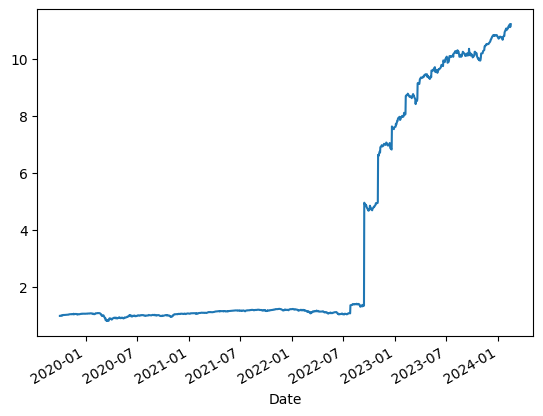

In [67]:
def compute_daily_return(row:pd.Series) -> float:
    perf = (1 + (row["OISESTR"] * 0.3 + row["SPX"] * 0.2 + row["SX5T"] * 0.5))
    if perf <0:
        print(row)
    return perf
benchmark.apply(
   compute_daily_return,
    axis=1,
).cumprod().plot()

In [51]:
benchmark.loc['2022-09-14'],benchmark.loc['2022-09-13']

(OISESTR       0.662000
 SPX        3946.010010
 SX5T       3567.560059
 Name: 2022-09-14 00:00:00, dtype: float64,
 OISESTR      -0.083000
 SPX        3932.689941
 SX5T       3586.179932
 Name: 2022-09-13 00:00:00, dtype: float64)

In [54]:
( 0.662000-( -0.083000))/( 0.083000)

8.975903614457831